In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

In [69]:
shannon_archive_df = pd.read_csv(r'C:\Users\jeanb\Documents\memoire\en_cours\results\rolling_shannon_archive_df.csv')
shannon_canon_df = pd.read_csv(r'C:\Users\jeanb\Documents\memoire\en_cours\results\rolling_shannon_canon_df.csv')
type_token_archive_df = pd.read_csv(r'C:\Users\jeanb\Documents\memoire\en_cours\results\rolling_type_token_archive_df.csv')
type_token_canon_df = pd.read_csv(r'C:\Users\jeanb\Documents\memoire\en_cours\results\rolling_type_token_canon_df.csv')

In [70]:
annee_canon = ['1811', '1816', '1822', '1823', '1825', '1827', '1827', '1829', '1829', '1829', '1830', '1830', '1830', '1831', '1831', '1831', '1831', '1831', '1832', '1832', '1832', '1832', '1833', '1833', '1833', '1833', '1833', '1834', '1834', '1834', '1834', '1834', '1834', '1835', '1836', '1836', '1837', '1837', '1837', '1837', '1838', '1838', '1838', '1839', '1839', '1839', '1839', '1839', '1840', '1840', '1840', '1840', '1840', '1841', '1841', '1841', '1841', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1842', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1844', '1844', '1844', '1844', '1844', '1844', '1844', '1844', '1844', '1844', '1844', '1844', '1844', '1844', '1844', '1844', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1845', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1847', '1847', '1847', '1847', '1847', '1847', '1847', '1847', '1848', '1848', '1848', '1848', '1848', '1849', '1849', '1849', '1849', '1849', '1849', '1849', '1849', '1849', '1849', '1849', '1850', '1850', '1850', '1850', '1850', '1850', '1850', '1850', '1850', '1851', '1851', '1851', '1851', '1851', '1851', '1851', '1851', '1852', '1852', '1852', '1853', '1853', '1853', '1853', '1854', '1854', '1854', '1854', '1854', '1854', '1854', '1854', '1854', '1854', '1854', '1855', '1855', '1855', '1855', '1855', '1855', '1855', '1855', '1855', '1855', '1856', '1856', '1856', '1856', '1857', '1857', '1857', '1857', '1858', '1858', '1858', '1858', '1858', '1858', '1858', '1859', '1859', '1859', '1859', '1860', '1860', '1860', '1860', '1861', '1861', '1862', '1862', '1862', '1862', '1862', '1863', '1863', '1863', '1864', '1864', '1864', '1864', '1864', '1864', '1864', '1864', '1864', '1865', '1865', '1865', '1865', '1865', '1866', '1866', '1866', '1867', '1867', '1868', '1868', '1869', '1869', '1869', '1869', '1870', '1870', '1870', '1871', '1871', '1871', '1872', '1872', '1872', '1872', '1872', '1872', '1872', '1872', '1872', '1872', '1872', '1873', '1873', '1873', '1873', '1873', '1873', '1874', '1874', '1874', '1874', '1874', '1874', '1874', '1875', '1875', '1875', '1875', '1876', '1876', '1876', '1876', '1876', '1877', '1877', '1877', '1877', '1877', '1877', '1878', '1878', '1878', '1878', '1879', '1879', '1879', '1879', '1880', '1880', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1883', '1883', '1883', '1883', '1883', '1883', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1885', '1885', '1885', '1885', '1885', '1885', '1885', '1885', '1886', '1886', '1886', '1886', '1886', '1886', '1886', '1886', '1886', '1886', '1886', '1886', '1887', '1887', '1887', '1887', '1887', '1887', '1887', '1887', '1887', '1887', '1887', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1889', '1889', '1889', '1889', '1889', '1889', '1890', '1890', '1890', '1890', '1890', '1890', '1890', '1890', '1890', '1891', '1891', '1891', '1891', '1891', '1891', '1892', '1892', '1892', '1892', '1892', '1892', '1892', '1892', '1893', '1893', '1893', '1893', '1893', '1893', '1894', '1894', '1894', '1894', '1895', '1895', '1895', '1895', '1895', '1895', '1896', '1896', '1896', '1896', '1896', '1896', '1896', '1897', '1897', '1897', '1897', '1897', '1897', '1897', '1897', '1898', '1898', '1898', '1898', '1898', '1899', '1899', '1899', '1899', '1899', '1900', '1900', '1900', '1900', '1900', '1900', '1901', '1901', '1901', '1902', '1902', '1903', '1903', '1903', '1903', '1903', '1904', '1904', '1904', '1904', '1904', '1904', '1904', '1904', '1905', '1905', '1905', '1905', '1905', '1906', '1906', '1906', '1907', '1907', '1907', '1908', '1908', '1908', '1908', '1908', '1908', '1909', '1909', '1910', '1910', '1911', '1911', '1911', '1911', '1911', '1912', '1912', '1912', '1912', '1913', '1913', '1913', '1913', '1913', '1913', '1914', '1914', '1914', '1914', '1915', '1916', '1917', '1917', '1918', '1918', '1919', '1919', '1919', '1919', '1920', '1920', '1920', '1921', '1921', '1921', '1921', '1921', '1921', '1921', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1923', '1923', '1923', '1923', '1924', '1925', '1925', '1925', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1927', '1927', '1927', '1927', '1927', '1927', '1927', '1927', '1927', '1927', '1928', '1928', '1928', '1928', '1928', '1929', '1929', '1929', '1929', '1929', '1929', '1930', '1930', '1930', '1930', '1931', '1931', '1931', '1931', '1931', '1931', '1931', '1931', '1931', '1931', '1931', '1932', '1932', '1932', '1932', '1932', '1932', '1932', '1932', '1932', '1932', '1933', '1933', '1933', '1933', '1933', '1933', '1933', '1934', '1934', '1934', '1934', '1934', '1934', '1935', '1935', '1935', '1935', '1936', '1936', '1936', '1936', '1936', '1936', '1936', '1937', '1937', '1937', '1937', '1938', '1938', '1938', '1938', '1938', '1939', '1939', '1939', '1939', '1939', '1939', '1940', '1941', '1941', '1941', '1941', '1941', '1941', '1941', '1942', '1942', '1942', '1942', '1942', '1942', '1942', '1943', '1943', '1943', '1943', '1943', '1944', '1944', '1944', '1944', '1944', '1945', '1946', '1947', '1947', '1947', '1947', '1947', '1947', '1947', '1947', '1948', '1948', '1948', '1949', '1949', '1949', '1949', '1950', '1950', '1950', '1950', '1950', '1950', '1950', '1950', '1951', '1951', '1951', '1951', '1951', '1951', '1951', '1951', '1951', '1952', '1952', '1953', '1953', '1953', '1953', '1953', '1953', '1954', '1954', '1954', '1954', '1954', '1954', '1954', '1954', '1955', '1955', '1955', '1955', '1956', '1956', '1956', '1957', '1957', '1957', '1958', '1958', '1958', '1958', '1958', '1958', '1959', '1959', '1959', '1959', '1960', '1960', '1960', '1960', '1960', '1961', '1961', '1962', '1962', '1963', '1963', '1963', '1963', '1963', '1963', '1964', '1964', '1964', '1964', '1965', '1965', '1965', '1966', '1966', '1966', '1966', '1967', '1967', '1967', '1967', '1968', '1968', '1968', '1968', '1968', '1968', '1968', '1969', '1969', '1969', '1969', '1970', '1970', '1970', '1970', '1970', '1970', '1971', '1971', '1971', '1971', '1971', '1971', '1972', '1972', '1972', '1972', '1972', '1972', '1973', '1973', '1974', '1974', '1975', '1975', '1975', '1975', '1975', '1976', '1976', '1976', '1977', '1977', '1977', '1977', '1978', '1978', '1978', '1978', '1978', '1979', '1979', '1979', '1980', '1980', '1981', '1981', '1981', '1981', '1982', '1982', '1982', '1982', '1983', '1983', '1983', '1983', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1985', '1985', '1985', '1985', '1985', '1986', '1986', '1986', '1986', '1986', '1986', '1986', '1987', '1987', '1987', '1987', '1987', '1987', '1987', '1987', '1988', '1988', '1988', '1989', '1989', '1989', '1989', '1989', '1989', '1990', '1990', '1990', '1990', '1990', '1990', '1991', '1991', '1991', '1991', '1991', '1991', '1992', '1992', '1992', '1992', '1992', '1992', '1992', '1993', '1993', '1993', '1993', '1993', '1993', '1993', '1993', '1994', '1994', '1994', '1994', '1994', '1994', '1994', '1994', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1996', '1996', '1996', '1996', '1996', '1996', '1996', '1996', '1996', '1997', '1997', '1997', '1997', '1997', '1997', '1997', '1997', '1997', '1998', '1998', '1998', '1998', '1998', '1998', '1998', '1998', '1999', '1999', '1999', '1999', '2000', '2000', '2000', '2000', '2000', '2000', '2000', '2001', '2001', '2001', '2001', '2001', '2001', '2001', '2001', '2001', '2001', '2001', '2001', '2002', '2002', '2002', '2002', '2002', '2003', '2003', '2003', '2003', '2003', '2003', '2003', '2003', '2003', '2004', '2004', '2004', '2004', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2006', '2006', '2006', '2006', '2006', '2006', '2007', '2007', '2007', '2007', '2007', '2007', '2007', '2007', '2007', '2008', '2008', '2008', '2008', '2008', '2008', '2008', '2008', '2008', '2008', '2008', '2008', '2009', '2009', '2009', '2009', '2009', '2009', '2009', '2009', '2009', '2009', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2011', '2011', '2011', '2011', '2011', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2015', '2015', '2015', '2015', '2015', '2015', '2016', '2016', '2016', '2016', '2018']
annee_archive = ['1812', '1815', '1815', '1816', '1816', '1816', '1816', '1816', '1816', '1817', '1817', '1817', '1819', '1819', '1819', '1821', '1822', '1822', '1824', '1824', '1824', '1824', '1825', '1826', '1826', '1826', '1826', '1827', '1827', '1827', '1827', '1827', '1827', '1828', '1829', '1829', '1831', '1831', '1831', '1831', '1831', '1831', '1832', '1832', '1832', '1832', '1832', '1832', '1832', '1832', '1832', '1833', '1833', '1833', '1833', '1834', '1834', '1834', '1834', '1834', '1834', '1835', '1835', '1835', '1835', '1836', '1836', '1836', '1836', '1836', '1837', '1837', '1837', '1838', '1838', '1838', '1838', '1838', '1838', '1839', '1839', '1840', '1840', '1840', '1840', '1842', '1842', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1843', '1844', '1844', '1844', '1844', '1844', '1844', '1844', '1845', '1845', '1845', '1845', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1846', '1847', '1847', '1847', '1847', '1847', '1847', '1847', '1848', '1848', '1849', '1850', '1850', '1850', '1850', '1850', '1851', '1851', '1851', '1851', '1852', '1852', '1852', '1852', '1852', '1852', '1853', '1853', '1853', '1853', '1853', '1853', '1853', '1853', '1853', '1854', '1854', '1854', '1854', '1854', '1855', '1855', '1855', '1855', '1855', '1855', '1855', '1855', '1855', '1856', '1856', '1856', '1856', '1856', '1856', '1856', '1856', '1856', '1856', '1856', '1856', '1856', '1857', '1857', '1857', '1857', '1857', '1857', '1857', '1857', '1857', '1857', '1857', '1857', '1857', '1857', '1858', '1858', '1858', '1858', '1858', '1858', '1858', '1858', '1858', '1858', '1858', '1858', '1859', '1859', '1859', '1859', '1859', '1859', '1859', '1859', '1859', '1859', '1859', '1859', '1859', '1859', '1859', '1859', '1859', '1860', '1860', '1860', '1860', '1860', '1860', '1860', '1860', '1860', '1860', '1860', '1860', '1860', '1860', '1861', '1861', '1861', '1861', '1861', '1861', '1861', '1861', '1861', '1861', '1861', '1861', '1861', '1861', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1863', '1863', '1863', '1863', '1863', '1863', '1863', '1863', '1863', '1863', '1863', '1863', '1863', '1863', '1864', '1864', '1864', '1864', '1864', '1864', '1864', '1864', '1864', '1864', '1864', '1864', '1864', '1864', '1864', '1865', '1865', '1865', '1865', '1865', '1865', '1865', '1865', '1865', '1865', '1865', '1865', '1865', '1865', '1866', '1866', '1866', '1866', '1866', '1866', '1866', '1866', '1866', '1866', '1866', '1866', '1866', '1866', '1866', '1866', '1866', '1866', '1866', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1867', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1868', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1870', '1870', '1870', '1870', '1870', '1870', '1870', '1870', '1871', '1871', '1871', '1871', '1871', '1872', '1872', '1872', '1872', '1872', '1872', '1872', '1872', '1872', '1873', '1873', '1873', '1873', '1873', '1873', '1873', '1873', '1873', '1873', '1873', '1873', '1874', '1874', '1874', '1874', '1874', '1874', '1874', '1874', '1874', '1874', '1874', '1874', '1874', '1874', '1875', '1875', '1875', '1875', '1875', '1875', '1875', '1875', '1875', '1875', '1875', '1875', '1875', '1875', '1875', '1875', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1876', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1877', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1878', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1879', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1880', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1881', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1882', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1883', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1884', '1885', '1885', '1885', '1885', '1885', '1885', '1885', '1885', '1885', '1885', '1885', '1885', '1885', '1885', '1885', '1885', '1885', '1886', '1886', '1886', '1886', '1886', '1886', '1886', '1886', '1886', '1886', '1886', '1886', '1886', '1886', '1887', '1887', '1887', '1887', '1887', '1887', '1887', '1887', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1888', '1889', '1889', '1889', '1889', '1889', '1889', '1889', '1889', '1889', '1889', '1889', '1890', '1890', '1890', '1890', '1890', '1890', '1890', '1890', '1890', '1890', '1890', '1890', '1890', '1890', '1890', '1890', '1890', '1891', '1891', '1891', '1891', '1891', '1891', '1891', '1891', '1891', '1891', '1891', '1891', '1891', '1891', '1891', '1892', '1892', '1892', '1892', '1892', '1892', '1892', '1892', '1892', '1892', '1892', '1892', '1892', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1893', '1894', '1894', '1894', '1894', '1894', '1894', '1894', '1894', '1894', '1894', '1894', '1894', '1894', '1894', '1894', '1895', '1895', '1895', '1895', '1895', '1895', '1895', '1895', '1895', '1895', '1895', '1896', '1896', '1896', '1896', '1896', '1896', '1896', '1897', '1897', '1897', '1897', '1897', '1897', '1897', '1897', '1897', '1897', '1897', '1897', '1897', '1897', '1897', '1897', '1898', '1898', '1898', '1898', '1898', '1898', '1898', '1898', '1898', '1898', '1898', '1899', '1899', '1899', '1899', '1899', '1899', '1899', '1899', '1899', '1899', '1899', '1899', '1899', '1899', '1899', '1899', '1899', '1899', '1899', '1900', '1900', '1900', '1900', '1900', '1900', '1900', '1901', '1901', '1901', '1901', '1901', '1901', '1901', '1901', '1901', '1902', '1902', '1902', '1902', '1902', '1902', '1902', '1902', '1902', '1903', '1903', '1903', '1903', '1903', '1903', '1903', '1903', '1903', '1903', '1904', '1904', '1904', '1904', '1904', '1904', '1904', '1904', '1904', '1904', '1905', '1905', '1905', '1905', '1905', '1905', '1905', '1905', '1905', '1905', '1905', '1905', '1905', '1905', '1905', '1906', '1906', '1906', '1906', '1906', '1906', '1906', '1906', '1906', '1907', '1907', '1907', '1907', '1907', '1907', '1907', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1908', '1909', '1909', '1909', '1909', '1909', '1909', '1909', '1909', '1909', '1909', '1909', '1909', '1909', '1909', '1909', '1909', '1910', '1910', '1910', '1910', '1910', '1910', '1910', '1910', '1910', '1910', '1910', '1910', '1910', '1910', '1910', '1910', '1910', '1910', '1910', '1910', '1911', '1911', '1911', '1911', '1911', '1911', '1911', '1911', '1911', '1911', '1911', '1911', '1911', '1912', '1912', '1912', '1912', '1912', '1912', '1912', '1912', '1912', '1912', '1912', '1912', '1913', '1913', '1913', '1913', '1913', '1913', '1913', '1913', '1913', '1913', '1913', '1913', '1914', '1916', '1916', '1916', '1916', '1916', '1917', '1917', '1917', '1917', '1917', '1917', '1917', '1918', '1918', '1918', '1918', '1918', '1918', '1918', '1918', '1918', '1918', '1918', '1919', '1919', '1919', '1919', '1919', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1921', '1921', '1921', '1921', '1921', '1921', '1921', '1921', '1921', '1921', '1921', '1921', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1923', '1923', '1923', '1923', '1923', '1923', '1923', '1923', '1923', '1924', '1924', '1924', '1924', '1924', '1924', '1924', '1924', '1924', '1924', '1925', '1925', '1925', '1925', '1925', '1925', '1925', '1925', '1925', '1925', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1927', '1927', '1927', '1927', '1927', '1928', '1928', '1928', '1928', '1928', '1928', '1928', '1928', '1929', '1929', '1929', '1929', '1929', '1930', '1930', '1930', '1930', '1930', '1930', '1930', '1930', '1930', '1931', '1931', '1931', '1931', '1932', '1932', '1932', '1932', '1932', '1933', '1933', '1933', '1933', '1933', '1934', '1934', '1934', '1934', '1934', '1934', '1934', '1935', '1935', '1935', '1935', '1935', '1936', '1936', '1937', '1937', '1938', '1939', '1940', '1941', '1941', '1941', '1942', '1942', '1943', '1943', '1943', '1945', '1945', '1945', '1945', '1945', '1946', '1946', '1946', '1946', '1947', '1947', '1947', '1947', '1947', '1948', '1948', '1948', '1948', '1948', '1948', '1948', '1949', '1949', '1949', '1950', '1950', '1950', '1950', '1950', '1950', '1950', '1950', '1950', '1951', '1951', '1951', '1951', '1951', '1951', '1951', '1951', '1951', '1952', '1952', '1952', '1952', '1952', '1952', '1952', '1952', '1953', '1953', '1953', '1953', '1953', '1953', '1953', '1953', '1953', '1953', '1953', '1954', '1954', '1954', '1954', '1954', '1954', '1954', '1954', '1954', '1954', '1954', '1954', '1954', '1954', '1954', '1954', '1954', '1954', '1955', '1955', '1955', '1955', '1955', '1955', '1955', '1955', '1956', '1956', '1956', '1956', '1956', '1956', '1956', '1956', '1956', '1956', '1956', '1956', '1956', '1957', '1957', '1957', '1957', '1957', '1957', '1957', '1957', '1957', '1957', '1958', '1958', '1958', '1958', '1958', '1958', '1958', '1959', '1959', '1959', '1959', '1959', '1959', '1959', '1959', '1959', '1959', '1960', '1960', '1960', '1960', '1960', '1960', '1960', '1960', '1960', '1960', '1960', '1960', '1961', '1961', '1961', '1961', '1961', '1961', '1961', '1961', '1962', '1962', '1962', '1962', '1962', '1962', '1963', '1963', '1963', '1963', '1963', '1963', '1964', '1964', '1965', '1965', '1965', '1965', '1965', '1965', '1966', '1966', '1966', '1966', '1967', '1967', '1967', '1967', '1968', '1968', '1968', '1968', '1968', '1968', '1968', '1969', '1969', '1969', '1969', '1969', '1969', '1969', '1970', '1970', '1970', '1970', '1971', '1971', '1971', '1971', '1971', '1971', '1972', '1972', '1972', '1972', '1972', '1972', '1972', '1972', '1972', '1972', '1972', '1972', '1973', '1973', '1973', '1973', '1973', '1973', '1974', '1974', '1974', '1974', '1974', '1974', '1974', '1975', '1975', '1975', '1975', '1975', '1975', '1975', '1975', '1976', '1976', '1977', '1977', '1977', '1977', '1978', '1978', '1978', '1979', '1979', '1980', '1980', '1980', '1981', '1981', '1981', '1981', '1982', '1982', '1982', '1982', '1982', '1983', '1984', '1984', '1984', '1985', '1985', '1986', '1986', '1987', '1988', '1988', '1989', '1989', '1990', '1991', '1991', '1991', '1991', '1991', '1993', '1993', '1994', '1994', '1994', '1994', '1994', '1995', '1995', '1995', '1995', '1995', '1996', '1996', '1996', '1997', '1997', '1997', '1997', '1997', '1998', '1998', '1998', '1998', '1999', '1999', '2000', '2000', '2000', '2000', '2000', '2000', '2000', '2001', '2001', '2001', '2001', '2001', '2001', '2002', '2002', '2002', '2002', '2002', '2002', '2002', '2003', '2003', '2003', '2003', '2003', '2004', '2004', '2004', '2004', '2004', '2004', '2004', '2005', '2005', '2005', '2005', '2005', '2006', '2006', '2006', '2006', '2006', '2006', '2007', '2007', '2007', '2007', '2007', '2007', '2007', '2007', '2007', '2008', '2008', '2008', '2008', '2008', '2008', '2008', '2008', '2008', '2009', '2009', '2009', '2009', '2009', '2009', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2010', '2011', '2011', '2011', '2011', '2011', '2011', '2011', '2011', '2011', '2011', '2011', '2011', '2011', '2011', '2011', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2016', '2016', '2016', '2016', '2016', '2016', '2016', '2017', '2017', '2017', '2017', '2017', '2018', '2018', '2019', '2019', '2020', '2020']

In [71]:
#suppression des valeurs problématiques
del shannon_canon_df['1922_Aragon-Louis_Les-aventures-de-Telemaque']
del type_token_canon_df['1922_Aragon-Louis_Les-aventures-de-Telemaque']
del shannon_canon_df['1978_Perec-Georges_Je-me-souviens']
del type_token_canon_df['1978_Perec-Georges_Je-me-souviens']

Répartition des données

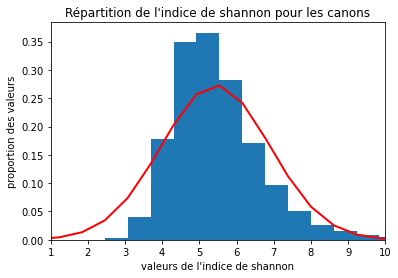

1.460675286604875

In [76]:
# mean = numpy.mean(data) 
# standard deviation as std = numpy.std(data)
data_sha_arch = shannon_archive_df.to_numpy()
data = data_sha_arch[np.logical_not(np.isnan(data_sha_arch))]
mu, std = norm.fit(data)
count, bins, ignored = plt.hist(data, 65, density=True)
plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * std**2) ),
         linewidth=2, color='r')
plt.ylabel('proportion des valeurs')
plt.xlabel("valeurs de l'indice de shannon")
plt.title("Répartition de l'indice de shannon pour les canons")
plt.xlim(1,10)
plt.show()

#relative standard deviation
#np.std(data)/data.mean()

#ecart type
np.std(data)

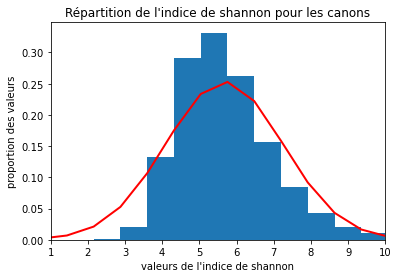

1.5755730134155408

In [78]:
data_sha_can = shannon_canon_df.to_numpy()
data = data_sha_can[np.logical_not(np.isnan(data_sha_can))]
mu, std = norm.fit(data)
count, bins, ignored = plt.hist(data, 100, density=True)
plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * std**2) ),
         linewidth=2, color='r')
plt.ylabel('proportion des valeurs')
plt.xlabel("valeurs de l'indice de shannon")
plt.title("Répartition de l'indice de shannon pour les canons")
plt.xlim(1,10)
plt.show()


#relative standard deviation
#np.std(data)/data.mean()

#ecart type
np.std(data)

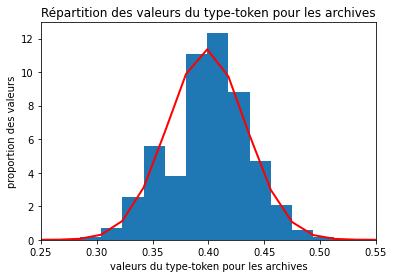

0.08815535732398848

In [74]:
data_tt_arch = type_token_archive_df.to_numpy()
data = data_tt_arch[np.logical_not(np.isnan(data_tt_arch))]
mu, std = norm.fit(data)
count, bins, ignored = plt.hist(data, 20, density=True)
plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * std**2) ),
         linewidth=2, color='r')
plt.ylabel('proportion des valeurs')
plt.xlabel("valeurs du type-token pour les archives")
plt.title('Répartition des valeurs du type-token pour les archives')
plt.xlim(0.25,0.55)
plt.show()


#relative standard deviation
np.std(data)/data.mean()

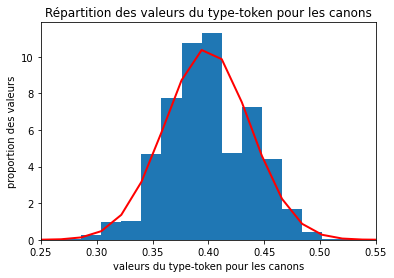

0.09561028971927792

In [75]:
data_tt_can = type_token_canon_df.to_numpy()
data = data_tt_can[np.logical_not(np.isnan(data_tt_can))]
mu, std = norm.fit(data)
count, bins, ignored = plt.hist(data, 25, density=True)
plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * std**2) ),
         linewidth=2, color='r')
plt.ylabel('proportion des valeurs')
plt.xlabel("valeurs du type-token pour les canons")
plt.title('Répartition des valeurs du type-token pour les canons')
plt.xlim(0.25,0.55)
plt.show()


#relative standard deviation
np.std(data)/data.mean()

passage et oeuvres les plus redondants / les moins redondants dans tout le corpus 

In [24]:
def min_max_results(df):
    max_value = 0
    name_max = ''
    min_value = 100
    name_min = ''
    for colonne in df:
        temp = df[colonne].to_numpy()
        temp = temp[np.logical_not(np.isnan(temp))]
        for value in temp:
            if value > max_value:
                max_value = value
                name_max = colonne
            if value < min_value and value > 0:
                min_value = value
                name_min = colonne
    print(max_value, name_max, min_value, name_min)

In [25]:
min_max_results(type_token_canon_df)

0.61 1991_Perec-Georges_Cantatrix-Sopranica-L-Et-Autres-Ecrits-Scientifiques 0.16 1953_Beckett-Samuel_L-Innommable


In [26]:
min_max_results(type_token_archive_df)

0.57 1875_Thierry-Gilbert-Jules-Augustin-(dit-Augustin-Thierry)_L-Aventure-d-une-ame-en-peine 0.19 1864_Ribelle-Charles-de-(pseud-Celine-d-Ornans)_Les-Confidences-de-Gribouille


In [27]:
min_max_results(shannon_canon_df)

145.11 1922_Aragon-Louis_Les-aventures-de-Telemaque 1.0 1823_Duras-Claire-de-Durfort_Ourika


In [28]:
min_max_results(shannon_archive_df)

39.98 1877_Rosary-Eugene_Le-Journal-d-une-jeune-fille 1.0 1869_Erckmann-Chatrian_Histoire-d-un-paysan-III


In [30]:
def min_max_mean_results(df):
    max_value = 0
    name_max = ''
    min_value = 100
    name_min = ''
    for colonne in df:
        temp = df[colonne].to_numpy()
        temp = temp[np.logical_not(np.isnan(temp))]
        value = temp.mean()
        if value > max_value and value<10.6:
            max_value = value
            name_max = colonne
        if value < min_value:
            min_value = value
            name_min = colonne
    print(max_value, name_max, min_value, name_min)

In [31]:
min_max_mean_results(type_token_canon_df)

0.48236363636363633 2001_Robbe-Grillet-Alain_La-reprise 0.29535714285714276 1986_Duras-Marguerite_Les-Yeux-Bleus-Cheveux-Noirs


<ipython-input-30-56630ee89388>:9: RuntimeWarning: Mean of empty slice.
  value = temp.mean()
C:\Users\jeanb\AppData\Roaming\Python\Python38\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [32]:
min_max_mean_results(shannon_canon_df)

10.516363636363637 1995_Duras-Marguerite_Ecrire 1.815 1965_Le-Clezio-Jean-Marie-Gustave_La-fievre


In [33]:
min_max_mean_results(type_token_archive_df)

0.49186440677966103 1917_Alanic-Mathilde_L'essor-des-colombes 0.28933333333333333 2004_Bouraoui-Nina_Poupee-Bella


<ipython-input-30-56630ee89388>:9: RuntimeWarning: Mean of empty slice.
  value = temp.mean()


In [34]:
min_max_mean_results(shannon_archive_df)

10.448666666666668 1991_Gailly-Christian_L-Air 2.045 1909_Dhanys-Marcel_La-fille-de-Racine


Romans canoniques les plus redondants du corpus

In [36]:
list_romans_redondants = ["1943_Saint-Exupery-Antoine-de_Le-petit-prince","1953_Beckett-Samuel_L-Innommable","1975_Ajar-Emile-Gary-Romain_La-Vie-Devant-Soi","1986_Duras-Marguerite_Les-Yeux-Bleus-Cheveux-Noirs","1995_Duras-Marguerite_Ecrire"]

In [37]:
def retrouve_points(list_romans_redondants):
    """fonction qui retourne les points associés aux titres des romans dans la liste"""
    points = []
    for roman in list_romans_redondants:
        temp_list = []
        temp_tt = type_token_canon_df[roman].to_numpy()
        temp_tt = temp_tt[np.logical_not(np.isnan(temp_tt))]
        temp_sha = shannon_canon_df[roman].to_numpy()
        temp_sha = temp_sha[np.logical_not(np.isnan(temp_sha))]
        temp_list.append(np.round(temp_tt.mean(),3))
        temp_list.append(np.round(temp_sha.mean(),3))
        points.append(temp_list)
    return points

In [38]:
points_romans_redondants = retrouve_points(list_romans_redondants)

In [44]:
#suppression d'une valeur problématique
del shannon_canon_df['1926_Kessel-Joseph_Les-Captifs']

In [45]:
temp1 = np.round(type_token_canon_df.mean().to_numpy(), 3)
temp2 = np.round(shannon_canon_df.mean().to_numpy(), 3)

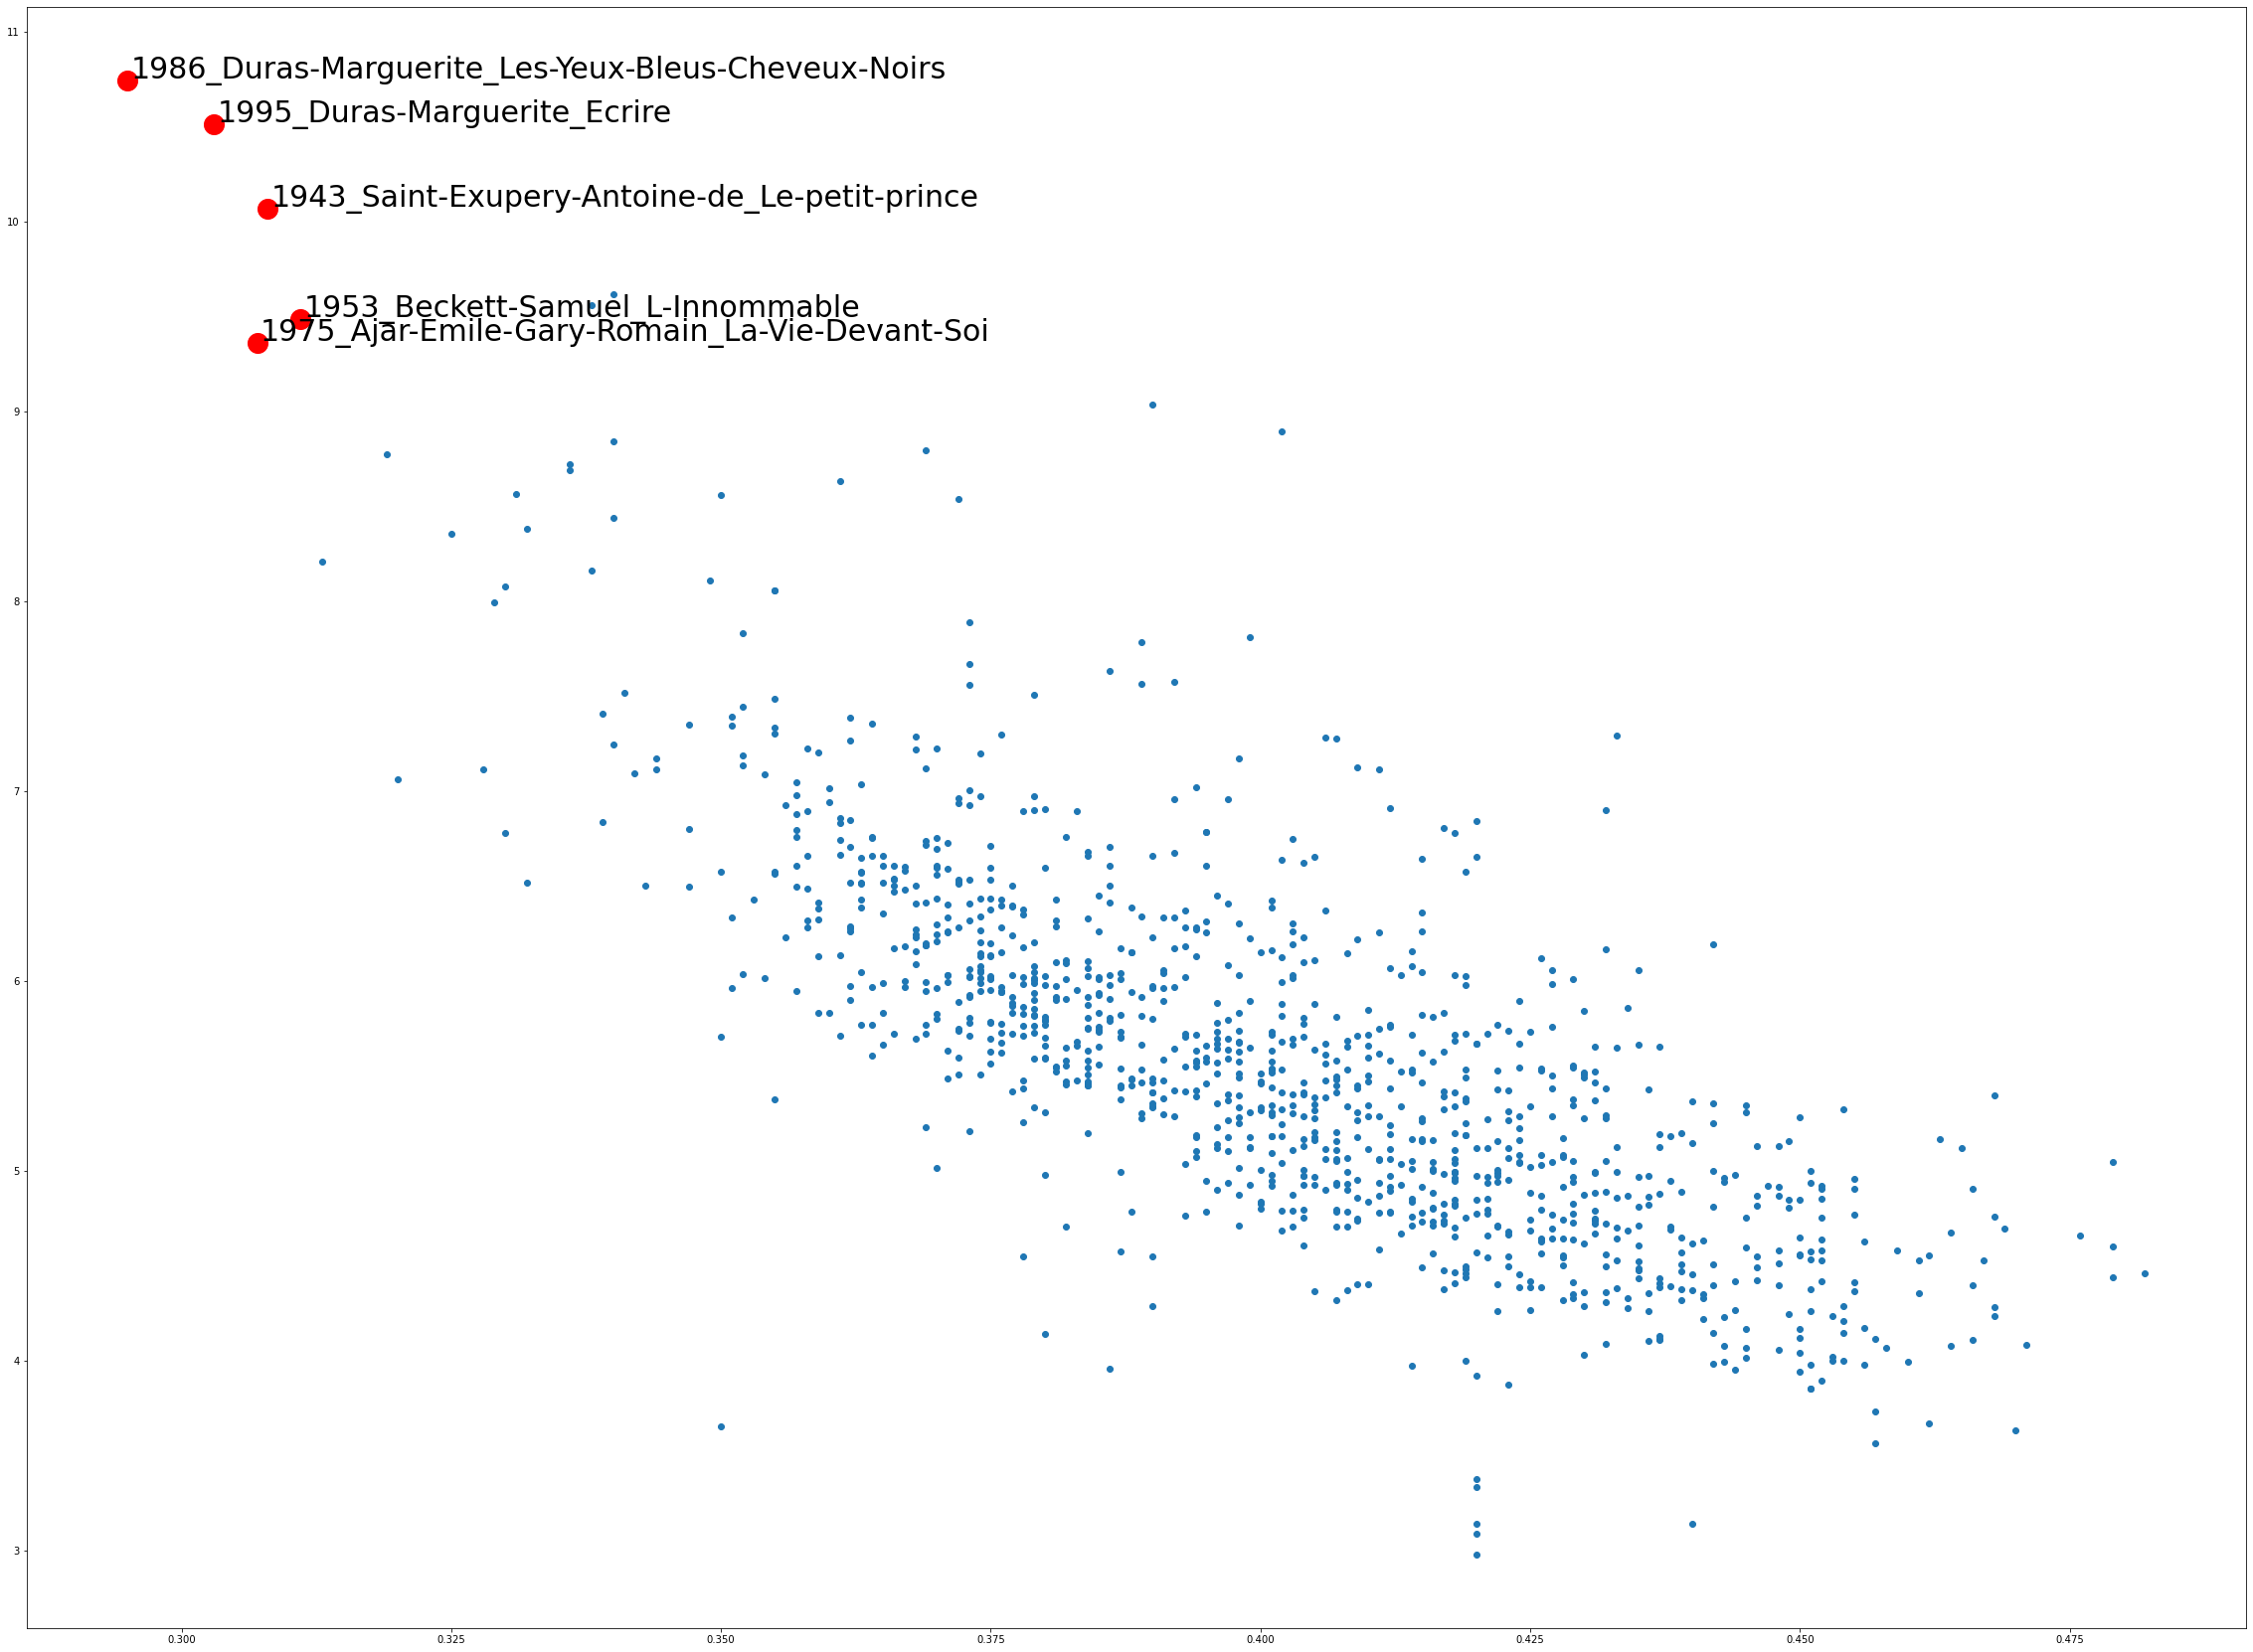

In [39]:
plt.figure(figsize=(40,30))
plt.scatter(np.round(type_token_canon_df.mean().to_numpy(),3), np.round(shannon_canon_df.mean().to_numpy(), 3))
for i in range(len(points_romans_redondants)):
    x = points_romans_redondants[i][0]
    y = points_romans_redondants[i][1]
    plt.plot(x, y, 'bo',color="red",markersize=20)
    plt.text(x * (1 + 0.001), y * (1 + 0.001) , list_romans_redondants[i], fontsize=30, rotation = 0)
plt.show()

In [46]:
temp1 = temp1[np.logical_not(np.isnan(temp1))]
temp2 = temp2[np.logical_not(np.isnan(temp2))]

In [47]:
X = temp1.reshape(-1, 1)
Y = temp2.reshape(-1, 1)

In [48]:
model = LinearRegression().fit(X, Y)
print(model.coef_)
print(model.intercept_)

[[-20.05218612]]
[13.63237638]


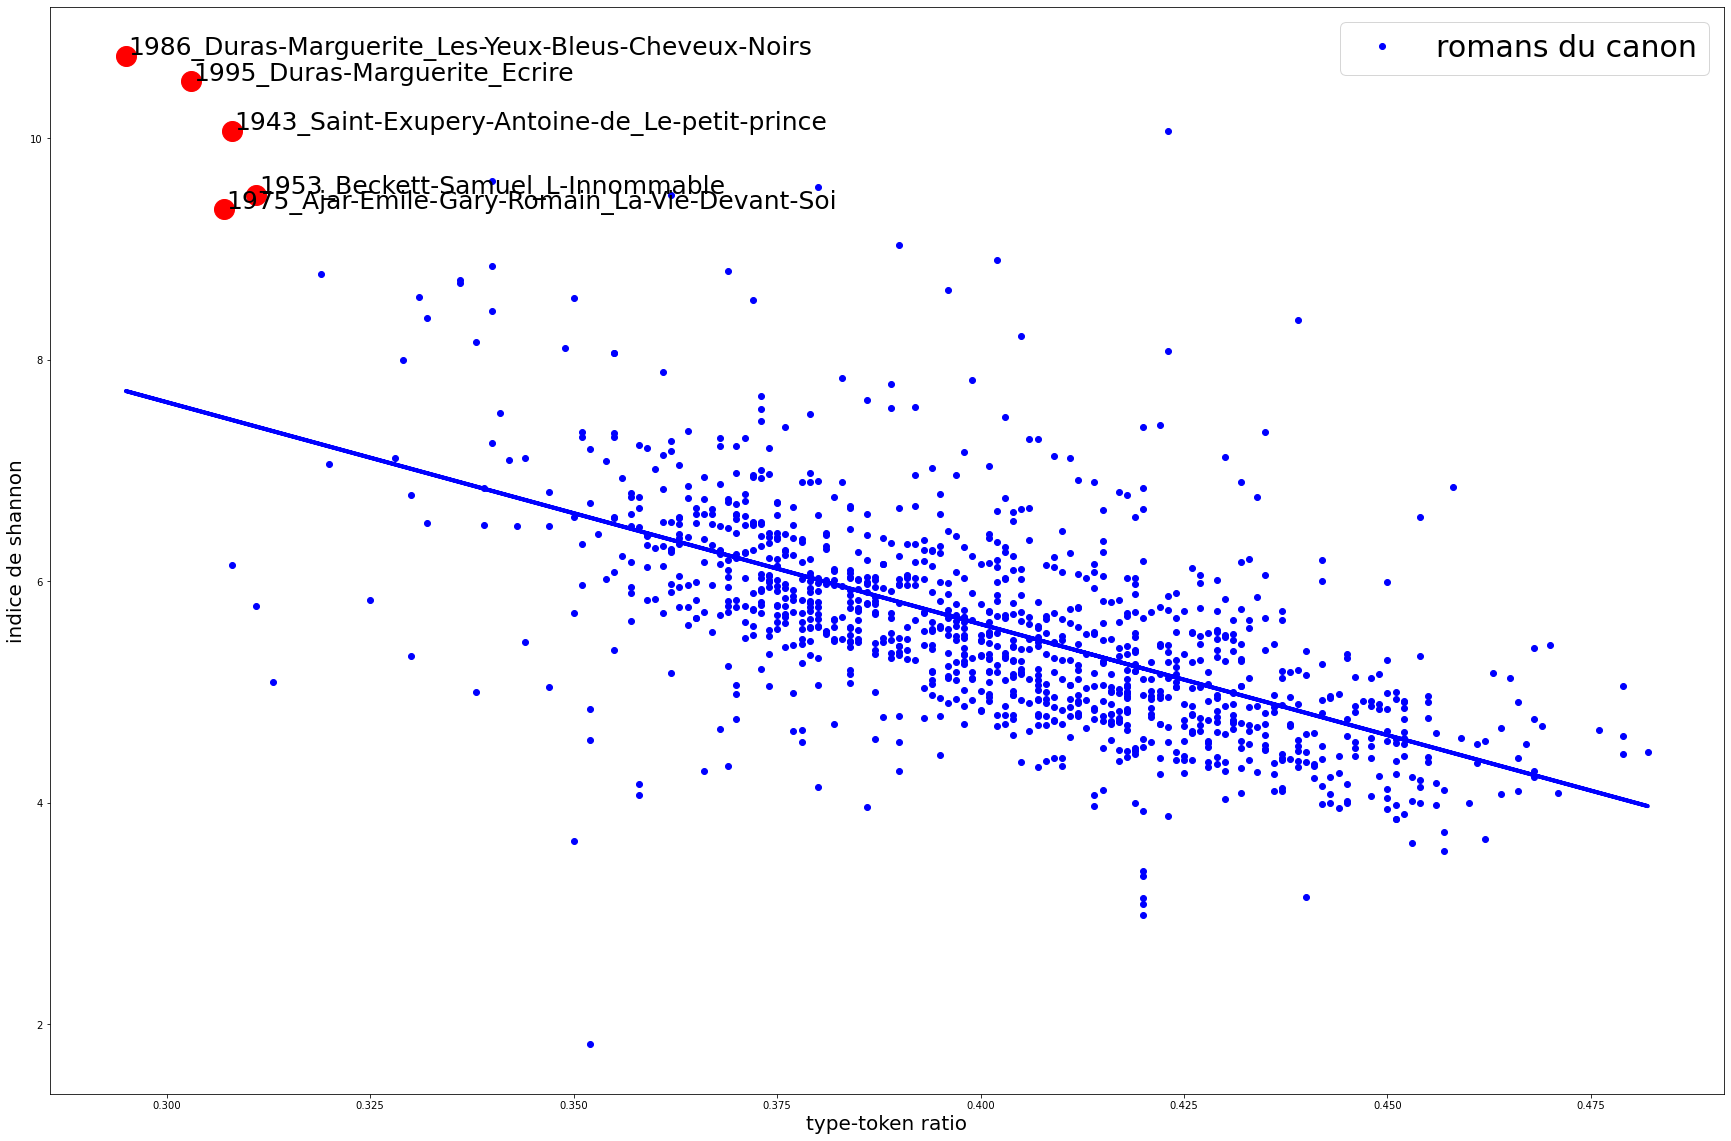

In [49]:
plt.figure(figsize=(30,20))
plt.plot(X, Y, 'bo', color='blue',label = 'romans du canon')
plt.plot(X, model.coef_*X+model.intercept_, color='blue',linewidth=4)
for i in range(len(points_romans_redondants)):
    x = points_romans_redondants[i][0]
    y = points_romans_redondants[i][1]
    plt.plot(x, y, 'bo',color="red", markersize=20)
    plt.text(x * (1 + 0.001), y * (1 + 0.001) , list_romans_redondants[i], fontsize=25, rotation = 0)
    
    
plt.ylabel('indice de shannon', fontsize=20)
plt.xlabel('type-token ratio', fontsize=20)

plt.legend(prop={'size': 30})

plt.show()

Place des romans du mouvement littéraire du Nouveau Roman dans la redondance des romans canoniques

In [61]:
shannon_archive_df = pd.read_csv(r'C:\Users\jeanb\Documents\memoire\en_cours\results\rolling_shannon_archive_df.csv')
shannon_canon_df = pd.read_csv(r'C:\Users\jeanb\Documents\memoire\en_cours\results\rolling_shannon_canon_df.csv')
type_token_archive_df = pd.read_csv(r'C:\Users\jeanb\Documents\memoire\en_cours\results\rolling_type_token_archive_df.csv')
type_token_canon_df = pd.read_csv(r'C:\Users\jeanb\Documents\memoire\en_cours\results\rolling_type_token_canon_df.csv')

In [62]:
#suppression des valeurs problématiques
del shannon_canon_df['1922_Aragon-Louis_Les-aventures-de-Telemaque']
del type_token_canon_df['1922_Aragon-Louis_Les-aventures-de-Telemaque']
del shannon_canon_df['1978_Perec-Georges_Je-me-souviens']
del type_token_canon_df['1978_Perec-Georges_Je-me-souviens']

In [63]:
nouveau_roman = ["1953_Robbe-Grillet-Alain_Les-Gommes", "1955_Robbe-Grillet-Alain_Le-Voyeur", "1961_Robbe-Grillet-Alain_L-Annee-derniere-a-Marienbad", "1976_Robbe-Grillet-Alain_Topologie-d-une-cite-fantome","1981_Robbe-Grillet-Alain_Djinn","1947_Simon-Claude_La-corde-raide","1954_Simon-Claude_Le-sacre-du-printemps","1967_Simon-Claude_Histoire","1973_Simon-Claude_Triptyque","1975_Simon-Claude_Leçon-De-Choses","1981_Simon-Claude_Les-Georgiques","1951_Beckett-Samuel_Malone-meurt","1951_Beckett-Samuel_Molloy","1953_Beckett-Samuel_L-Innommable","1970_Beckett-Samuel_Le-Depeupleur","1939_Sarraute-Nathalie_Tropismes","1959_Sarraute-Nathalie_Le-Planetarium","1976_Sarraute-Nathalie_disent-les-imbeciles","1983_Sarraute-Nathalie_Enfance","1995_Sarraute-Nathalie_Ici","1997_Sarraute-Nathalie_Ouvrez"]

In [64]:
points_nouveau_roman = retrouve_points(nouveau_roman)

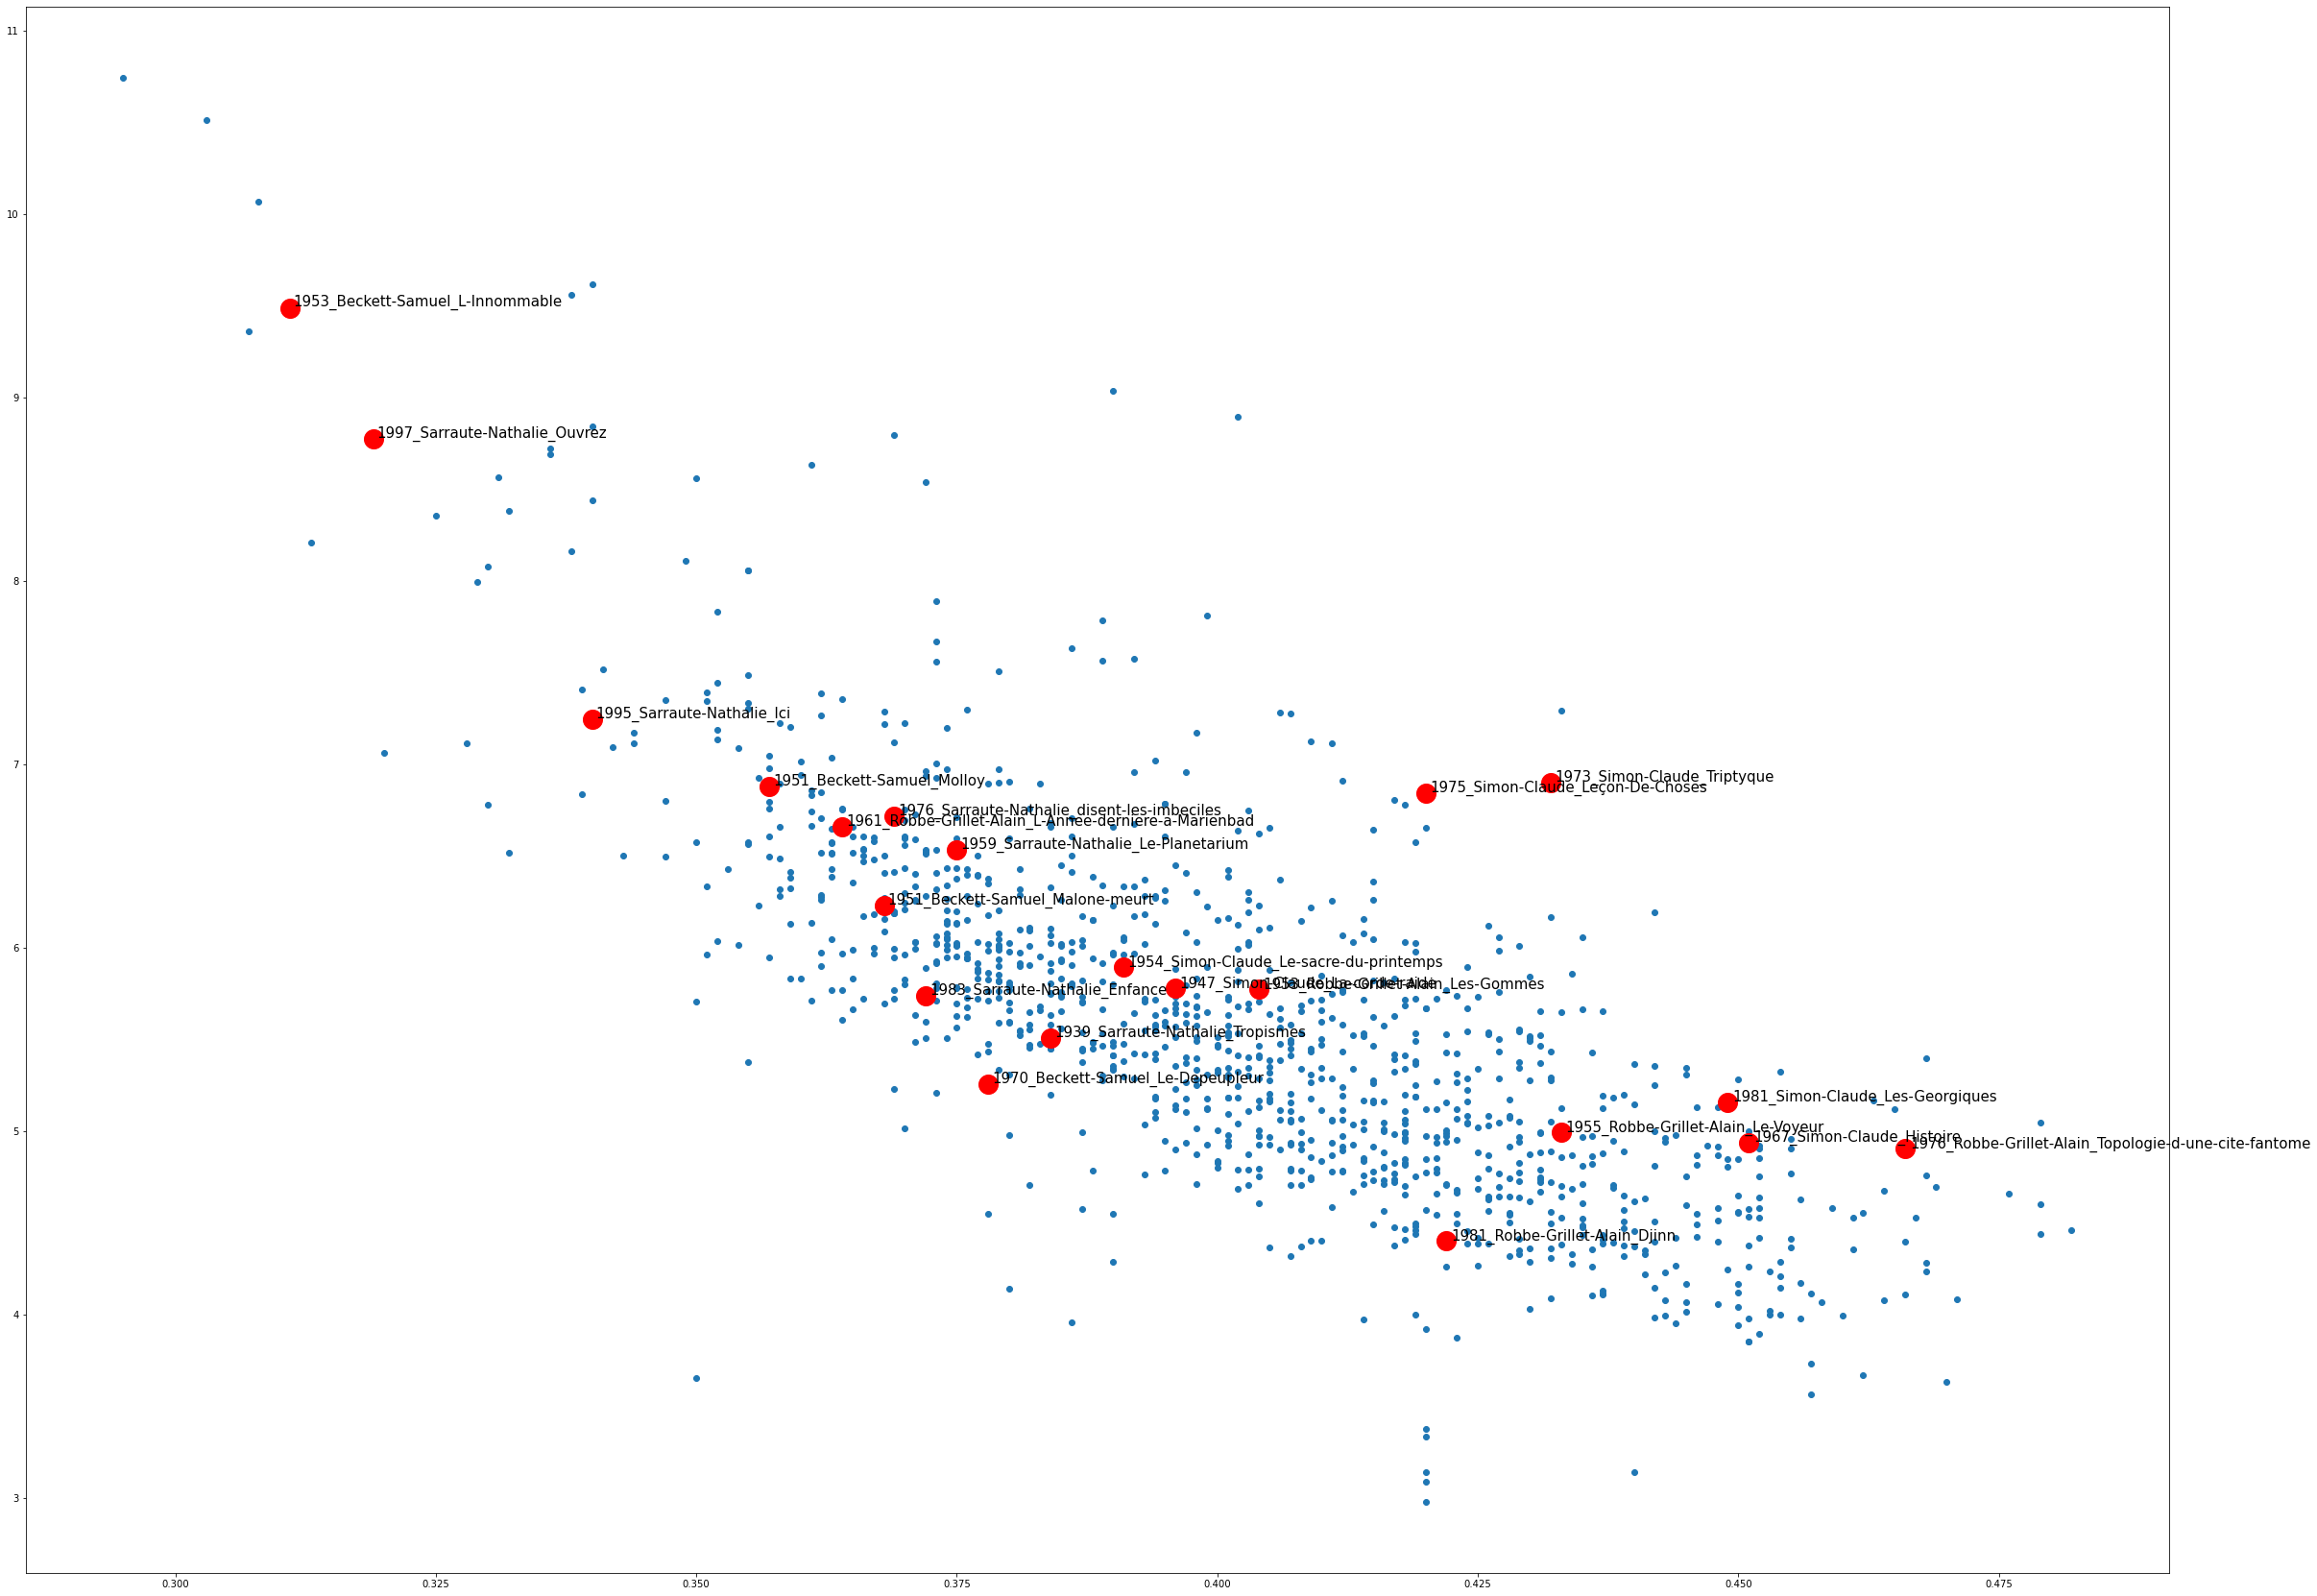

In [81]:
plt.figure(figsize=(40,30))
plt.scatter(np.round(type_token_canon_df.mean().to_numpy(),3), np.round(shannon_canon_df.mean().to_numpy(), 3))
for i in range(len(points_nouveau_roman)):
    x = points_nouveau_roman[i][0]
    y = points_nouveau_roman[i][1]
    plt.plot(x, y, 'bo',color="red",markersize=20)
    plt.text(x * (1 + 0.001), y * (1 + 0.001) , nouveau_roman[i], fontsize=15, rotation = 0)
plt.show()